In [8]:
from files.tfct import TFCT
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from scipy.io import wavfile
pio.renderers.default = "browser"

In [9]:
tfct = TFCT("files\\sound.wav")

In [10]:
tfct.cut_signal()


<AxesSubplot:>

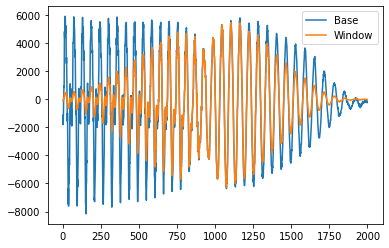

In [11]:
df = pd.DataFrame()
df["Base"]=tfct.trames[100]
df["Window"]=tfct.windowed_trames[100]
df.plot()

In [12]:
tfct.apply_fft_on_window()
tfct.apply_fft_on_trames()

In [13]:
wind_spec = tfct.windowed_trames_specter[100]
tram_spec = tfct.trames_specter[100]
df_specter = pd.DataFrame(abs(tram_spec[0]),index=tram_spec[1],columns=["Base"])
df_specter["Wind"] = abs(wind_spec[0])

<AxesSubplot:>

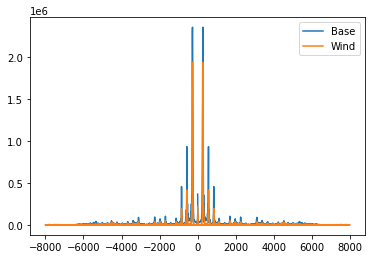

In [14]:
df_specter.plot()

In [15]:
tfct.build_xmat()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [19]:
tfct.x_mat.columns = [i for i in tfct.windowed_trames_specter[0][1][:len(tfct.x_mat.columns)]]

In [ ]:
px.imshow(tfct.x_mat,labels={"x":"Hz","y":"t"})

In [4]:
freq, data = wavfile.read("files\\diapason.wav")

<AxesSubplot:>

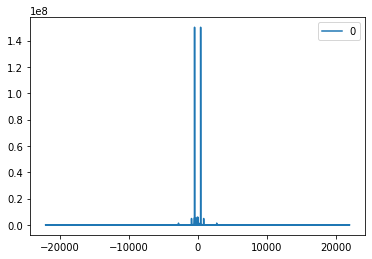

In [5]:
spec = np.abs(np.fft.fft(data))
freq = np.fft.fftfreq(len(data),1/freq)
pd.DataFrame(spec,index=freq).plot()

<AxesSubplot:>

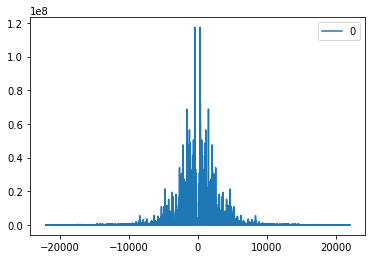

In [6]:
freq, data = wavfile.read("files\\saxo.wav")
spec = np.abs(np.fft.fft(data))
freq = np.fft.fftfreq(len(data),1/freq)
pd.DataFrame(spec,index=freq).plot()

In [ ]:
tfct = TFCT("files\\piano.wav")
tfct.